Extreme Gradient Boosting(XGB), GBM modelin hız ve tahmin performansını artırmak için optimize edilmiş halidir.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
df = pd.read_csv("../Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League", "Division" , "NewLeague" ,"Salary"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)

In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 3.0 MB/s eta 0:00:49
   ---------------------------------------- 1.8/150.0 MB 3.7 MB/s eta 0:00:40
    --------------------------------------- 2.6/150.0 MB 3.9 MB/s eta 0:00:39
    --------------------------------------- 3.1/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 3.9/150.0 MB 3.6 MB/s eta 0:00:42
   - -------------------------------------- 4.7/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 5.5/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 6.0/150.0 MB 3.5 MB/s eta 0:00:41
   - -------------------------------------- 6.6/150.0 MB 3.3 MB/s eta 0:00:44
   - -------------------------------------- 7.1/150.0 MB 3.3 MB/s eta 0:00:44
   -- ------------------------------------- 7.9/150.0 MB 3.3 MB/s eta 0:00:44


In [13]:
import xgboost
from xgboost import XGBRegressor

In [42]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [43]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_pred = xgb.predict(X_test)

In [48]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

277.47656224903164

In [61]:
xgb_params = {"learning_rate": [0.1, 0.01, 0.5],
              "max_depth": [2,3,4,5,8],
              "n_estimators": [100, 200, 500,1000],
              "colsample_bytree": [0.4, 0.7,1,1]}

In [63]:
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv =10, n_jobs = -1).fit(X_train, y_train)

In [64]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 200}

In [69]:
xgb_tuned =  XGBRegressor(learning_rate= 0.01 , max_depth=2 ,n_estimators=200 ,colsample_bytree=0.4 ).fit(X_train, y_train)

In [71]:
y_pred = xgb_tuned.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

251.7639515965289

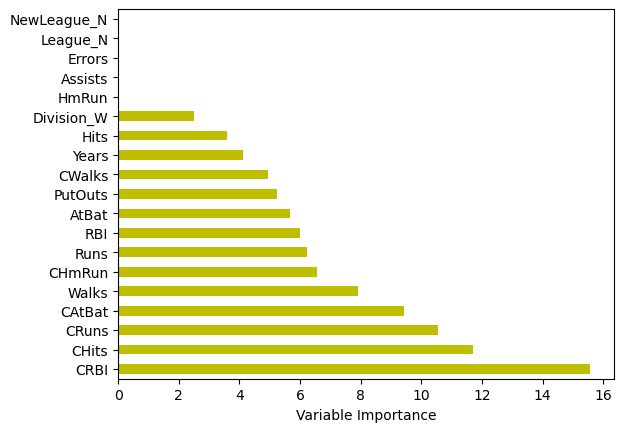

In [73]:
#degisken onem duzeyleri kontrolu
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending=False).plot(kind = "barh", color = "y")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None